# Day 22

## Part 1

- to pass the force field a path must be traced on a board
- the first part of the notes is a map of the board
- the 2nd half is the path description:
    - numbers indicate number of steps to go
    - letters indicate whether to turn left or right in place
- start at the leftmost tile in the top row facing to the right
- paths wrap around to the other side of the map if they go off the edge
- if a wall is on the other side of the map, this counts as being in the way
- determine the `row`, `column` and `facing` at the final position
    - rows start from 1 at the top
    - column 1 starts at the left
    - direction:
        - right = 0
        - down = 1
        - left = 2
        - up = 3
- the final password is: 1000 * `row` + 4 * `column` + `facing`

`What is the final password?`

In [1]:
from matplotlib import pyplot as plt
import numpy as np
from utils import parse_from_file, ParseConfig

parser = ParseConfig('\n\n', [
    ParseConfig('\n', ParseConfig('', str)),
    str
])

board, direction_input = parse_from_file(
        'day_22.txt', parser)

print(f'directions: {direction_input[:10]}...')
print(f'board: [{board[0]}, ...]')

directions: 35L7L12L18...
board: [[' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '#', '#', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.', '#', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'], ...]


In [2]:
# let's pad the board with void on the sides that aren't quite as long
max_width = max([len(row) for row in board])
for row in board:
    while len(row) < max_width:
        row.append(' ')

Text(0.5, 1.0, 'board already?!')

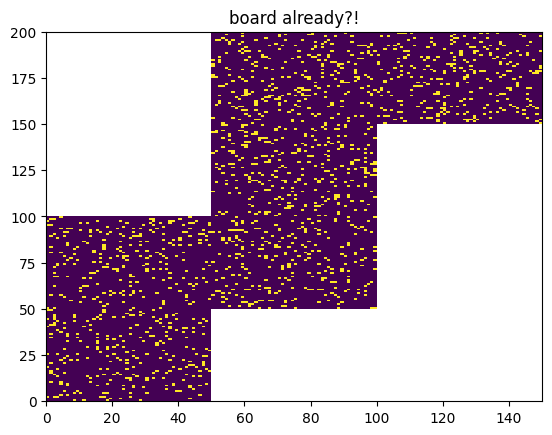

In [3]:
def plot_board_and_path(
    board: list[list[str]], path: list[tuple[int]]
) -> tuple[plt.Figure, list[list[plt.Axes]]]:
    """
    creates a pcolormesh plot of a board with a plot superimposed on top
    """
    void = np.nan
    floor = 0
    wall = len(path) + 1
    grid_width = max([len(row) for row in board])
    grid = []
    for row in board:
        grid.append([])
        for material in row:
            match material:
                case ' ':
                    value = void
                case '.':
                    value = floor
                case '#':
                    value = wall
            grid[-1].append(value)
        while len(grid[-1]) < grid_width:
            grid[-1].append(void)

    for step, (x, y) in enumerate(path, 1):
        grid[y][x] = step

    fig, ax = plt.subplots()
    ax.pcolormesh(list(reversed(grid)))

    return fig, ax

fig, ax = plot_board_and_path(board, [])
ax.set_title('board already?!')

In [4]:
# find the start point
for x, material in enumerate(board[0]):
    match material:
        case '.':
            start = (x, 0)
            break
        case _:
            continue

print(start)

(50, 0)


In [5]:
# now let's parse the path input
directions = []
buffer = ''
for char in direction_input:
    if char in ('L', 'R'):
        directions.append(int(buffer))
        directions.append(char)
        buffer = ''
        continue
    buffer += char
directions.append(int(buffer))

print(directions[:10], directions[-10:])

[35, 'L', 7, 'L', 12, 'L', 18, 'R', 42, 'R'] ['L', 20, 'R', 32, 'L', 23, 'L', 32, 'L', 39]


In [6]:
# let's goooo!
right, down, left, up = (1, 0), (0, 1), (-1, 0), (0, -1)
turn_right = {right: down, down: left, left: up, up: right}
turn_left = {right: up, up: left, left: down, down: right}
facing = right
positions = [start]
for index, step in enumerate(directions):
    print(f'step #: {index}' + ' '*10, end='\r')
    # if we need to turn
    if step == 'R':
        facing = turn_right[facing]
        continue
    elif step == 'L':
        facing = turn_left[facing]
        continue
    # else let's move forward
    for _ in range(step):
        x, y = [value + delta for value, delta in zip(positions[-1], facing)]
        # run position off and around if off the board until we get back
        x %= len(board[0])
        y %= len(board)
        while board[y][x] == ' ':
            x, y = [
                value + delta for value, delta in zip((x, y), facing)]
            x %= len(board[0])
            y %= len(board)
        # now check if we hit a wall
        if board[y][x] == '#':
            continue
        # if not, continue moving that way
        positions.append((x, y))

Text(0.5, 1.0, 'a little bit round the houses')

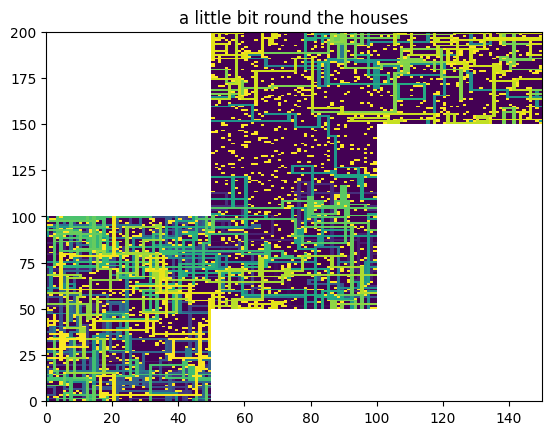

In [7]:
fig, ax = plot_board_and_path(board, positions)
ax.set_title('a little bit round the houses')

In [8]:
col, row = [value + 1 for value in positions[-1]]
facing_scores = {right: 0, down: 1, left: 2, up: 3}
facing_score = facing_scores[facing]

final_password = 1000 * row + 4 * col + facing_score

print(f'the final password is {final_password}!')

the final password is 164014!
